## Quiz 2

1. Generate a sample of 200 points from a 2D Gaussian with mean $\mu_1 = \begin{bmatrix} 3 \\ 3 \end{bmatrix}$ and covariance $\Sigma_1 = \begin{bmatrix} 4 & 0 \\ 0 & 4 \end{bmatrix}$ (1 point)

Hint: np.random.multivariate_normal()

In [76]:
import numpy as np
u1 = np.array([3,3])
E1 = np.array([[4,0],[0,4]])
sample1 = np.random.multivariate_normal(u1, E1, 200)
print(sample1.shape)
print(sample1)

(200, 2)
[[ 3.57749891  2.33889594]
 [ 4.0928085   1.40444848]
 [ 4.20916766  4.62336669]
 [ 5.94198969  5.56678692]
 [ 7.03730798  2.26599181]
 [ 4.7363203   3.59807898]
 [ 4.19734829  2.47200384]
 [ 0.69547389  1.3142354 ]
 [ 0.20681627  2.97898571]
 [ 3.13154942  3.95431964]
 [ 2.83158004  3.38660291]
 [ 1.11432764  3.91863332]
 [ 4.83671313  5.89175993]
 [-0.99121489  2.9203537 ]
 [ 3.28905724  2.79910085]
 [ 3.72132065  2.26585271]
 [ 4.0017646  -1.7352066 ]
 [ 7.14797675  4.13354358]
 [ 3.86554798  4.61628002]
 [ 7.61388853  5.03041171]
 [ 1.89097077  3.54676445]
 [ 4.27758866  4.05644993]
 [ 5.11990148  1.83067797]
 [ 3.34993553  5.56217528]
 [ 1.06582922 -0.51030109]
 [ 2.58828929  0.66449339]
 [ 2.66884541  5.05073097]
 [ 3.8076252   2.23665714]
 [ 0.43597075  3.43591246]
 [ 1.21469666  1.35305023]
 [ 1.94623787  2.43478597]
 [ 1.43459118  2.78294819]
 [ 2.13107853  4.69995427]
 [ 2.40603852  0.41964617]
 [ 2.8773839   5.13257128]
 [ 5.61579763  1.94428897]
 [ 5.77935323  5.32

2. Generate a second sample of 200 points from a 2D Gaussian with mean $\mu_2 = \begin{bmatrix} 5 \\ 5 \end{bmatrix}$ and covariance $\Sigma_2 = \begin{bmatrix} 4  &  0 \\ 0 & 4 \end{bmatrix}$. (1 point)


In [77]:
# Your code here
u2 = np.array([5,5])
E2 = np.array([[4,0],[0,4]])
sample2 = np.random.multivariate_normal(u2, E2, 200)

3. Assuming the first set of points is class 0 and the second set of points is class 1, plot the data in separate plots with different colors for each class below. (1 point)

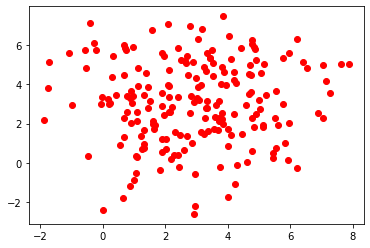

In [78]:
# Your code here
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(sample1[:,0], sample1[:,1], c='red')

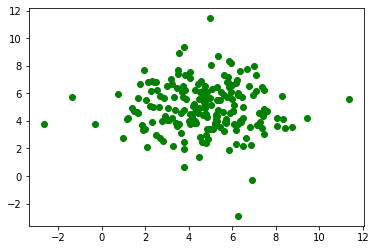

In [79]:
plt.scatter(sample2[:,0], sample2[:,1], c='green')

4. StandardScale your data and Split to training, validation and testing sets with the ratio of 70:10:20. You may use train_test_split from sklearn or from-scratch. Any of your choosing will do. (2 points)

In [80]:
# Your code here
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


scaler = StandardScaler()
sample1 = scaler.fit_transform(sample1)

intercept = np.ones((sample1.shape[0],1))
X = np.concatenate((intercept, sample1), axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X[:,0],X[:,1],train_size=0.7, test_size=0.2)

5. Perform a classification using logistic regression using LogisticRegression class you have written (hopefully you submitted the assignments). This should be **stochastically** trained. Make sure to plot your training loss during the training. (2 points)

In [84]:
class LogisticRegression:
    def __init__(self, alpha=0.001, max_iter=1000, method="sto"):
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        
    def logistic_regression_GD(self, X, Y):
        self.W = np.random.rand(X.shape[1], Y.shape[1])
        self.losses = []
        # Calculate time taken
        start_time = time.time()
        
        if self.method == "sto":
            print("STO METHOD")
            sampled = []
            for i in range(self.max_iter):
                random_sample = random.randint(0, len(X))
                while random_sample in sampled:
                    random_sample = random.randint(0, len(X))
                if len(sampled) >= len(X):
                    sampled = []
                else:
                    sampled.append(random_sample)
                X_train_sample = X[random_sample-1, :].reshape(1,-1)
                Y_train_sample = Y[random_sample-1]
                cost, grad = self.gradient(X_train_sample, Y_train_sample)
                self.losses.append(cost)
                self.W = self.W - self.alpha*grad
                if i % 1000 == 0:
                    print(f"Cost at iteration {i}", cost)
            print("Final thetas:\n", self.W, " at iteration:", i)
            print("Time taken:", time.time()-start_time,"s")
        
        else:
            raise ValueError

    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        cost = - np.sum(Y * np.log(h)) / m
        error = h - Y
        grad = self.softmax_grad(X, error)
        return cost, grad

    def h_theta(self, X, W):
        return self.softmax(X @ W)

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Training Losses as Number of iters increases")
        plt.xlabel("Epoch")
        plt.ylabel("costs")
        plt.legend()
        
    def yhat(self, X_test):
        return np.argmax((self.h_theta(X_test, self.W)), axis=1)

In [85]:
model1 = LogisticRegression()
model1.logistic_regression_GD(X_train, y_train)

IndexError: tuple index out of range

6. Evalutate your model using your **from-scratch classification reports**. (1 point)

In [6]:
# Your code here


7. Now, perform GNB using sklearn and use **classification_reports from sklearn** to evaluate your model. (1 point)

In [7]:
# Your code here


8. In Q4, you were asked to set aside some data as your validation set. Notice that we have not used it at all. If we were to use it, how would you go about this? (1 point)

In [ ]:
# Your answer here

9. **Discuss** your results (DISCUSS NOT REPORT). (2 points)

Examples: which one is better, why? and why not?. The nature of data? which model is more suitable? How to improve your results? 

In [8]:
# Your DISCUSSION here